## Bagging and Pasting Technique

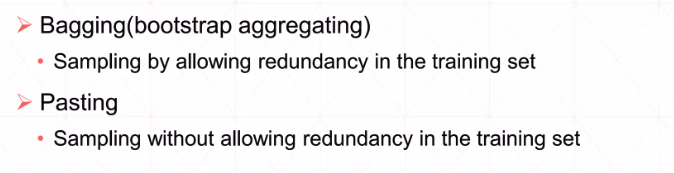

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
# Load dataset
data = load_iris()
X = data.data
y = data.target

In [8]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [9]:
# Initialize basic decision tree classifier
base_model = DecisionTreeClassifier(random_state=42)

In [12]:
# Bagging Model ( Bootstap Sampling with Replacement)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, random_state=42)

In [13]:
# Predict 
y_pred_bagging = bagging_model.predict(X_test)

In [14]:
# Bagging Accuracy
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

In [15]:
# confusion matix and classification report for bagging
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
report_bagging = classification_report(y_test, y_pred_bagging)

### Pasting

In [16]:
pasting_model = BaggingClassifier(estimator=base_model, n_estimators=50, bootstrap=False, random_state=42)

In [17]:
pasting_model.fit(X_train, y_train)
y_pred_pasting = pasting_model.predict(X_test)

In [18]:
pasting_accuracy = accuracy_score(y_test, y_pred_pasting)

In [19]:
cm_pasting = confusion_matrix(y_test, y_pred_bagging)
report_pasting = classification_report(y_test, y_pred_bagging)

In [20]:
# --- Displaying Results ---
print(f"Accuracy with Bagging: {bagging_accuracy * 100:.2f}%")
print(f"Accuracy with Pasting: {pasting_accuracy * 100:.2f}%\n")

Accuracy with Bagging: 100.00%
Accuracy with Pasting: 100.00%



In [21]:
# Confusion Matrices
print("Confusion Matrix for Bagging:")
print(cm_bagging)

Confusion Matrix for Bagging:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [22]:
print("\nConfusion Matrix for Pasting:")
print(cm_pasting)


Confusion Matrix for Pasting:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [23]:
# Classification Reports for detailed performance metrics
print("\nClassification Report for Bagging:")
print(report_bagging)



Classification Report for Bagging:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
print("\nClassification Report for Pasting:")
print(report_pasting)


Classification Report for Pasting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
# --- Cross-validation comparison between Bagging and Pasting ---
# We will perform 5-fold cross-validation on both models to get a better estimate of their performance
bagging_cv_scores = cross_val_score(bagging_model, X, y, cv=5)
pasting_cv_scores = cross_val_score(pasting_model, X, y, cv=5)

print(f"\n5-fold Cross-validation scores for Bagging: {bagging_cv_scores}")
print(f"Mean CV score for Bagging: {bagging_cv_scores.mean():.2f}")

print(f"\n5-fold Cross-validation scores for Pasting: {pasting_cv_scores}")
print(f"Mean CV score for Pasting: {pasting_cv_scores.mean():.2f}")


5-fold Cross-validation scores for Bagging: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV score for Bagging: 0.97

5-fold Cross-validation scores for Pasting: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean CV score for Pasting: 0.97


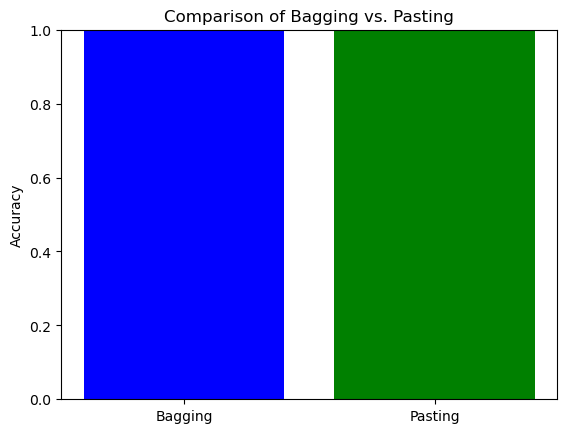

In [26]:
# --- Visualize the performance with a Bar plot ---
models = ['Bagging', 'Pasting']
accuracies = [bagging_accuracy, pasting_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Bagging vs. Pasting')
plt.ylim(0, 1)
plt.show()

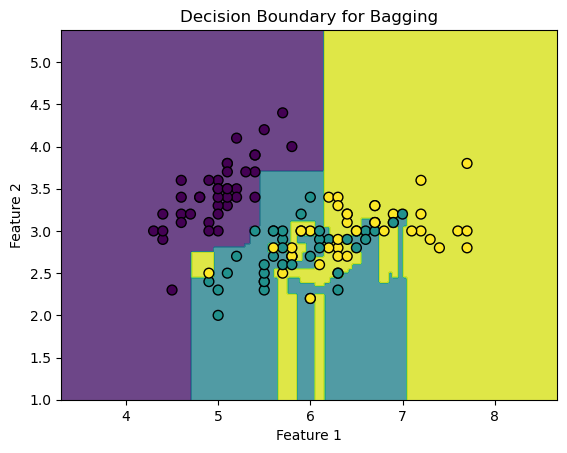

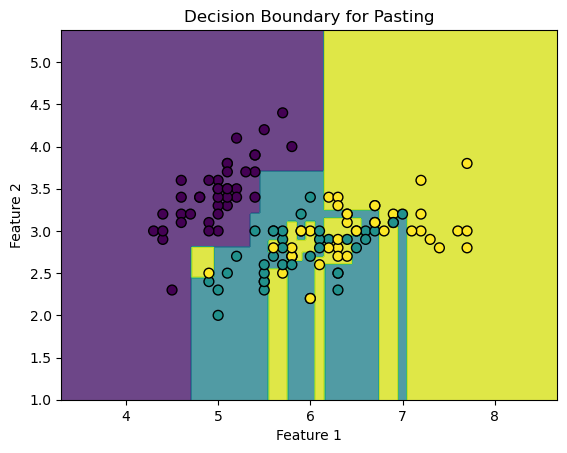

In [30]:
# --- Plot Decision Boundaries for both Bagging and Pasting ---
# We will visualize the decision boundaries for the first two features in the dataset.

def plot_decision_boundaries(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Visualize Decision Boundaries for Bagging
X_train_2d = X_train[:, :2]  # Just taking the first two features for easy visualization
bagging_model_2d = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
bagging_model_2d.fit(X_train_2d, y_train)
plot_decision_boundaries(X_train_2d, y_train, bagging_model_2d, "Decision Boundary for Bagging")

# Visualize Decision Boundaries for Pasting
pasting_model_2d = BaggingClassifier(estimator=base_model, n_estimators=50, bootstrap=False, random_state=42)
pasting_model_2d.fit(X_train_2d, y_train)
plot_decision_boundaries(X_train_2d, y_train, pasting_model_2d, "Decision Boundary for Pasting")